<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

So far, the ‘dialect’ we have used to talk to Matplotlib is called the Matlab-like pyplot(``plt``) interface. From here onward, I will show you how to use the other, more powerful ‘dialect’ called the Object Oriented (``OO``) interface. This way of talking to Matplotlib gives us a more nuanced control over what is going on by allowing us to manipulate the various axes easily.

# Some nomenclature

A figure is simple; it is the full canvas you use to draw stuff on. <br>
An axis is the individual mathematical axes we use for plotting. <br>
So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png)
<br>

By the way, you had already encountered a situation with multiple axes in the last chapter when we used ``twinx()``. <br>
It is not uncommon to struggle with the concept of axes; but don’t worry; it will become clearer as we work through this chapter.

# Comparing the two ‘dialects’

Create the same plot using both ``pyplot`` and OO ‘dialects.

### pyplot Interface

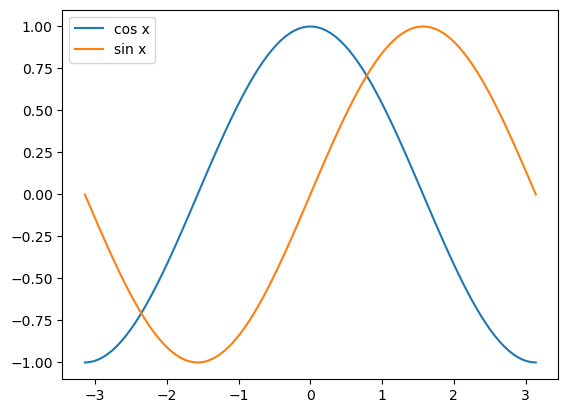

In [8]:
import numpy as np  # Importing NumPy library and aliasing it as np
from matplotlib import pyplot as plt  # Importing pyplot module from Matplotlib library and aliasing it as plt

x = np.linspace(-np.pi, np.pi, num=100)  # Creating an array of 100 equally spaced values between -π and π
cos_x = np.cos(x)  # Calculating the cosine of each value in x
sin_x = np.sin(x)  # Calculating the sine of each value in x

plt.plot(x, cos_x, label='cos x')  # Plotting cosine values against x with a label
plt.plot(x, sin_x, label='sin x')  # Plotting sine values against x with a label
plt.legend()  # Displaying legend for the plot

### OO Interface

For the OO interface, we have to start by using ``subplots()`` to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (``fig``) and an axis (``ax``).
<br>
Although I have used the variables ``fig`` and ``ax`` you are free to call them what you like. But this is what is commonly used in the documentation. In this example, I need only one column and one row. But, if I want, I can ask for a grid like in the plot right at the top. <br>
It is more complicated than ``pylot`` but offers more freedom that is worth learning it for more demanding,complex plots.

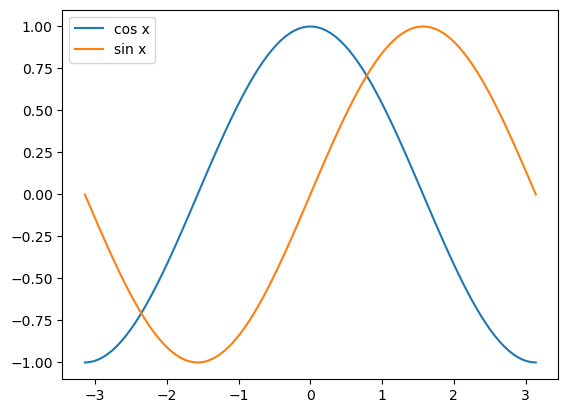

In [7]:
import numpy as np  # Importing NumPy library
from matplotlib import pyplot as plt  # Importing pyplot module from Matplotlib library

x = np.linspace(-np.pi, np.pi, num=100)  # Creating an array of 100 equally spaced values between -π and π
cos_x = np.cos(x)  # Calculating the cosine of each value in x
sin_x = np.sin(x)  # Calculating the sine of each value in x

fig, ax = plt.subplots(nrows=1, ncols=1)  # Creating a figure and axis object
ax.plot(x, cos_x, label='cos x')  # Plotting cosine values against x on the axis with a label
ax.plot(x, sin_x, label='sin x')  # Plotting sine values against x on the axis with a label
ax.legend()  # Displaying legend for the plot

# What is OO ax, really?

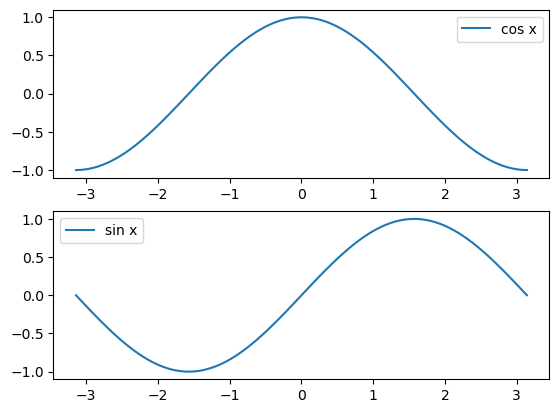

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

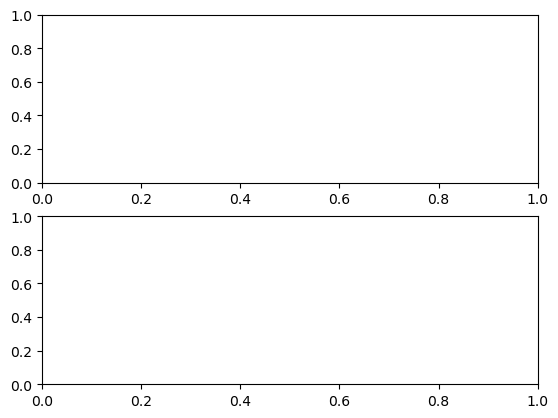

In [11]:
#To get the above plot, we must ask for two rows (nrows=2) and one column (ncols=1). We do this by using subplots().
fig, ax = plt.subplots(ncols=1, nrows=2)
#This should give me two axes so that I can plot in both panes.

In [12]:
#What is ax?
type(ax)

numpy.ndarray

In [16]:
#What size is ax?
ax.shape
#ax has two ‘things’.I have no idea what 2 things ax has but
#It could mean that ax contains two elements, possibly representing two different entities associated with the plot.

(2,)

In [15]:
#What is contained in ax? 
type(ax[0])
#Matplotlib axis.

matplotlib.axes._axes.Axes

# A complete OO example

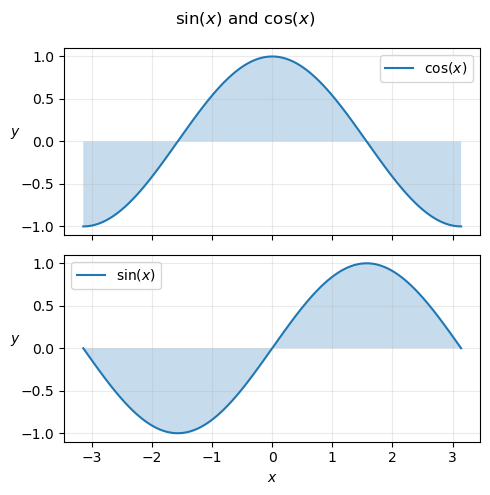

In [18]:
# Create a figure and axis object with 2 rows and 1 column, sharing the x-axis, and with a specified size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), sharex=True)

# Plot the cosine function on the first subplot and fill the area beneath the curve with transparency
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)

# Plot the sine function on the second subplot and fill the area beneath the curve with transparency
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

# Iterate over each axis object in the list
for a in ax:
    # Add a legend to each subplot
    a.legend()
    # Add a grid to each subplot with a transparency of 0.25
    a.grid(alpha=.25)
    # Set the y-label for each subplot, and rotate it to be horizontal
    a.set_ylabel('$y$', rotation=0)

# Set the x-label for the second subplot
ax[1].set_xlabel('$x$')

# Add a title to the figure with LaTeX expressions for the sine and cosine functions
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# Adjust the layout of the subplots to ensure they fit within the figure without overlapping
fig.tight_layout()

1. Set up the axes and figure
- Get two axes ready to plot in two rows in one column.
- Change the size of the figure by specifying a figure size (``figsize``).
- Ask that the plots share the x-axis using ``sharex``.

2. Since ``ax`` is a NumPy array with two axes, we can index them using ``0`` and ``1``. Then we just ``plot`` to that axis.

3. Use ``fill_between()`` to fill the plots.
- I have again just indexed the NumPy array to access the axes.

4. Draw the legends
- As in the previous example, we can do this one axis at a time. However, a more sensible way to do this is with a ``for`` loop that iterates through the items in ``ax``
- Let’s also add a grid to each plot and set the label.

5. We are sharing the x-axis. So, we only need to label the lowest plot. This has the index 1.

6. Let’s add a super title to the figure (notplot).

7. Finally, let’s ask Matplotlib to make any necessary adjustments to the layout to make our plot look nice by calling ``tight_layout()``. It would help if you convinced yourself of the utility of ``tight_layout()`` by producing the plot with and without it.

<br>

Note: Unfortunately, the ``pyplot`` and OO interfaces don’t use identical function names. For example, ``pyplot`` used ``xlabel()`` to set the 
 label, but OO uses ``set_xlabel()``. 

# Multiple rows and columns

| [![Left Image](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png)](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png) | [![Right Image](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_multiple_main.png)](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_multiple_main.png) |
|:---:|:---:|

Now, I will show you how to work with multiple rows and columns that form a grid of plots like the one on the left. However, let’s start by using the figure on the right.
<br> 
I have intentionally kept it simple (only setting the title and plotting some lines) so that we can identify how ``ax`` works.

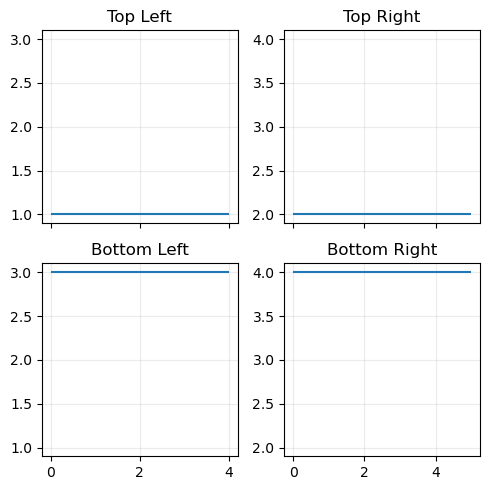

In [36]:
# Create a 2x2 grid of subplots with shared x-axis and y-axis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5, 5), sharex='col', sharey='col')

# Access each subplot individually for better readability
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# Set titles for each subplot
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

# Draw horizontal lines on each subplot
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

# Add gridlines to all subplots with alpha value of 0.25
for a in ax.flatten():
    a.grid(alpha=.25)

# Adjust subplot layout to prevent overlap
plt.tight_layout()

### Using ``ax``

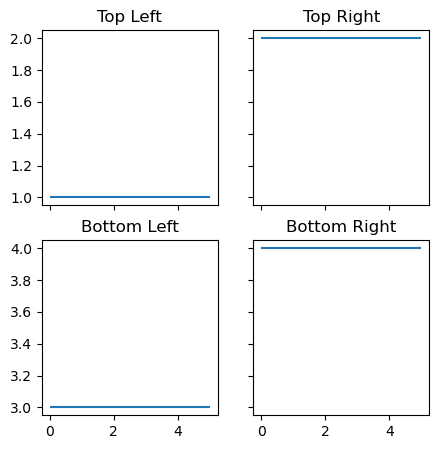

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
#We know there must be four axes; but how is ax structured? Let’s look at its shape.
ax.shape
#So, ax is organised as you see in the figure, as a 2 x 2 array.
#So, I can access each of the axes as follows:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')
#When you have to tweak each axis separately, I find it easy to use a familiar variable. I can do this by:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]
#or can use top_left, top_right, bottom_left, bottom_right = ax.flatten()
#flatten() takes the 2D array and ‘flattens’(dah) it into a 1D array; unpacking takes care of the assignments.
#Draw lines using hlines():
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

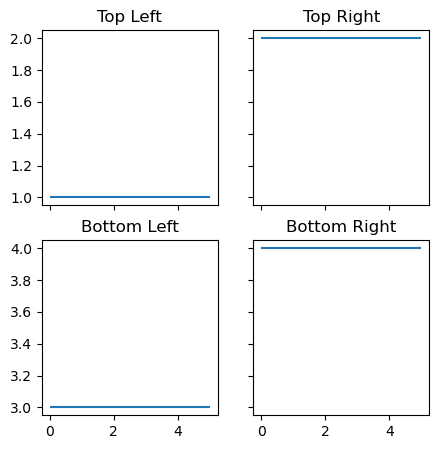

In [37]:
#Explanation just for the code itself:
# Create a 2x2 grid of subplots with shared x-axis and y-axis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5, 5), sharex='col', sharey='row')

# Check the shape of the ax array to understand its structure
ax.shape

# Access each subplot individually by indexing the ax array
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

# Access each subplot individually using variable assignments
top_left = ax[0, 0]
top_right = ax[0, 1]
bottom_left = ax[1, 0]
bottom_right = ax[1, 1]

# Draw horizontal lines on each subplot
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

Notice I have asked Matplotlib to make the plots more compact by sharing the x and y axes using ``sharex`` and ``sharey``.
<br>
Let’s first see what happens if I do not specify how to share.

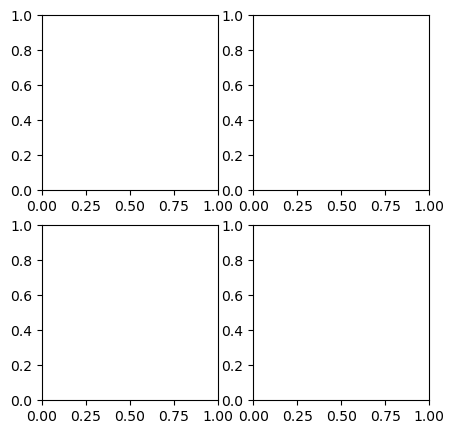

In [42]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)
#Matplotlib has auto-scaled both axes. NOTICE that it goes from 0 to 1 compared to the sp2273 website. 
#I believe it is because plt.tight_layout() was used just now and hence auto-applied since did not specify so mine is 1. 

| Option | Result                                 |
|:------:|----------------------------------------|
|  True  | Makes all the axes use the same range. |
|   col  | Use the same range for all the columns |
|   row  | Use the same range for all the rows    |

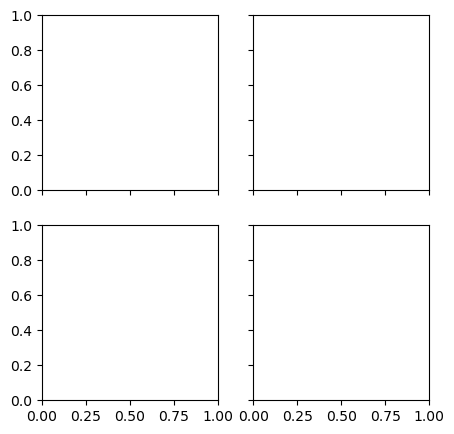

In [47]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)
#all the plots will have the same range for the x-axis.

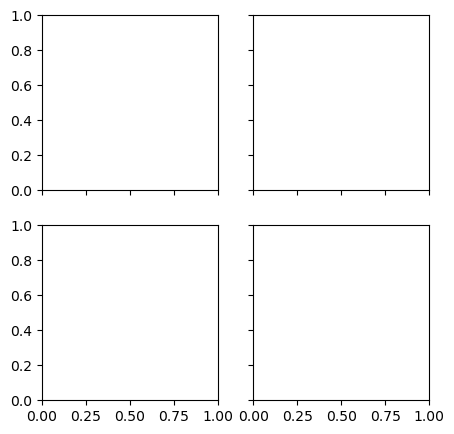

In [49]:
# Create a figure with 2 rows and 2 columns of subplots
# Each subplot will share the x-axis within its column and the y-axis within its row
fig, ax = plt.subplots(
    nrows=2, ncols=2,  # Define the number of rows and columns for the subplots grid
    figsize=(5, 5),     # Set the size of the figure to 5x5 inches
    sharex='col',      # Share the x-axis across columns (subplots in the same column)
    sharey='row'      # Share the y-axis across rows (subplots in the same row)
)
#Difference between the 2 codes:
# When sharex=True is used, it indicates that the x-axis should be shared among all subplots, regardless of whether they are in the same column or not. 
#In contrast, sharex='col' specifically shares the x-axis only among subplots within the same column.

## Accessing all axes

In [51]:
#You will often want to apply changes to all the axes, like in the case of the grid. You can do this by:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [53]:
#But this is inefficient and requires a lot of work. It is much nicer to use a for loop:
for a in ax.flatten():
    a.grid(alpha=.25)

# Other useful plots (Different plots, plot style and change of plot styles)

## Histograms

A histogram is a valuable tool for showing distributions of data. For this example, I have extracted some actual data from [sg.gov](https://beta.data.gov.sg/) related to the mean monthly earnings of graduates from the various universities in Singapore.

### Data

| Mean basic monthly earnings by graduates | Result                                                       |
|:----------------------------------------:|--------------------------------------------------------------|
|                    All                   | sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv |
|                 NUS Only                 | sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv |

### A quick helper function

In [57]:
#The reason for skipping the first line when loading the data is typically because it contains headers or metadata that describe the columns
#or provide additional information about the data, rather than actual data values. 
#Skipping this line ensures that only the data values are loaded into memory, making the data processing and analysis more efficient.
def get_plot_data(): #defines a function named get_plot_data.
    data = {}        #initializes an empty dictionary data to store the loaded data
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) 
    #loads data from the CSV file specified by filename into a NumPy array and stores it in the data dictionary with the key 'All'. 
    #The skiprows=1 argument skips the first line of the CSV file,likely because it contains headers or metadata rather than the actual data.

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)
    # Similarly, loads data from the second CSV file into a NumPy array and stores it in the data dictionary with the key 'NUS'.

    return data #data function returns the data dictionary containing the loaded data from both CSV files.

#The purpose of this function is to encapsulate the process of reading data from these files,
#making it easier to reuse the code whenever you need to access this data in your analysis or visualization tasks.


In [60]:
def get_plot_data():
    data = {}  # Initialize an empty dictionary to store the loaded data
    
    # Specify the file paths
    #I think this is needed so I did it differently from SP2273 website.
    filename_all = r'C:\Users\teren\OneDrive\Desktop\learning-portfolio-Terencetjc\plotting\sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    filename_nus = r'C:\Users\teren\OneDrive\Desktop\learning-portfolio-Terencetjc\plotting\sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    
    # Load data from the CSV files into NumPy arrays and store them in the data dictionary
    data['All'] = np.loadtxt(filename_all, skiprows=1)  # Load data from the first CSV file and skip the first row
    data['NUS'] = np.loadtxt(filename_nus, skiprows=1)  # Load data from the second CSV file and skip the first row
    
    return data  # Return the data dictionary containing the loaded data from both CSV files
get_plot_data()

{'All': array([3701., 2850., 3053., ..., 3856., 3303., 3245.]),
 'NUS': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
        3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
        3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
        2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
        3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
        4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
        3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
        2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
        2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
        2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
        3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
        2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
        3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381., 3470.,
      

### The histogram

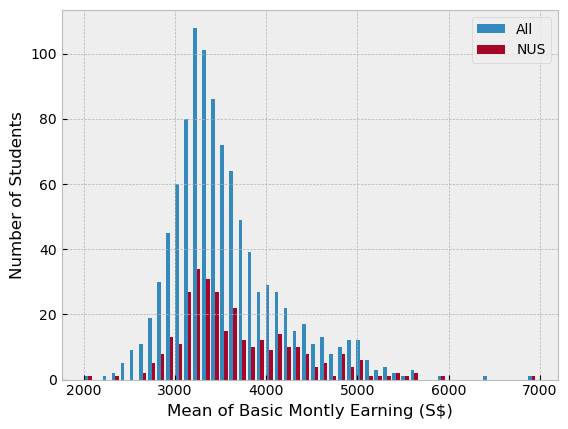

In [62]:
# Set the plot style to 'bmh' (Bayesian Methods for Hackers)
plt.style.use('bmh')

# Call the function to get plot data from CSV files and assign it to the variable 'data'
data = get_plot_data()

# Create a histogram plot with two datasets: 'All' and 'NUS'
# The 'All' dataset represents all students, and the 'NUS' dataset represents students from NUS
# The 'bins' parameter specifies the number of bins to split the data into
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])

# Set the label for the x-axis of the plot to 'Mean of Basic Montly Earning (S$)'
plt.xlabel('Mean of Basic Montly Earning (S$)')

# Set the label for the y-axis of the plot to 'Number of Students'
plt.ylabel('Number of Students')

# Add a legend to the plot to identify the datasets ('All' and 'NUS')
plt.legend()

## Scatter plots

Scatter plots are created by putting a marker at an (x,y) point you specify. They are simple yet powerful.
<br>
I will be lazy and use the same data as the previous example. But, since I need some values for x I am going to use ``range()`` along with ``len()`` to generate a list ``[0,1,2...]`` appropriate to the dataset.

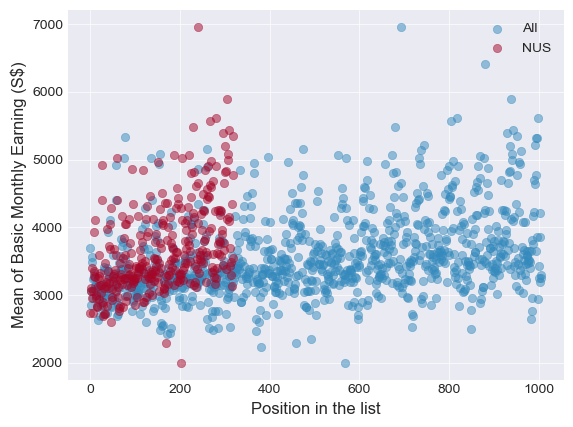

In [63]:
# Set the plot style to 'seaborn-v0_8-darkgrid'
plt.style.use("seaborn-v0_8-darkgrid")

# Call the function to get plot data from CSV files and assign it to the variable 'data'
data = get_plot_data()

# Iterate over the items (key-value pairs) in the 'data' dictionary
# 'label' will be the key ('All' or 'NUS') and 'numbers' will be the corresponding NumPy array
for label, numbers in data.items():
    # Create x-values as a range of numbers from 0 to the length of 'numbers'
    x = range(len(numbers))
    # Assign the y-values to 'numbers'
    y = numbers
    # Create a scatter plot with x and y values, and set the label to the current 'label'
    # The 'alpha' parameter controls the transparency of the markers
    plt.scatter(x, y, label=label, alpha=.5)

# Set the label for the x-axis of the plot to 'Position in the list'
plt.xlabel('Position in the list')

# Set the label for the y-axis of the plot to 'Mean of Basic Monthly Earning (S$)'
plt.ylabel('Mean of Basic Monthly Earning (S$)')

# Add a legend to the plot to identify the datasets ('All' and 'NUS')
plt.legend()

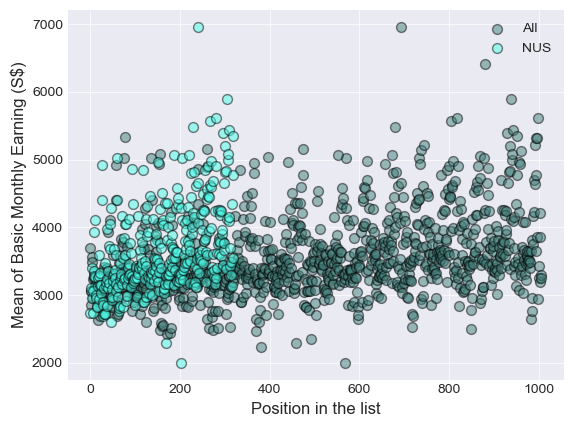

In [66]:
# Set the style of the plot to seaborn-v0_8-darkgrid
plt.style.use("seaborn-v0_8-darkgrid")

# Get the plot data using the function get_plot_data()
data = get_plot_data()

# Loop through each dataset in the data dictionary
for label, numbers in data.items():
    # Generate x-values as the range of the length of the numbers
    x = range(len(numbers))
    # y-values are the data points in the dataset
    y = numbers
    # Scatter plot the data points with customized settings
    plt.scatter(x, y, label=label, alpha=.5, color=np.random.rand(3,), marker='o', s=50, edgecolor='black', linewidth=1)
#Scatter plots the data points with customized settings, including transparency (alpha), color (color), marker style (marker), marker size (s), edge color (edgecolor), and edge width (linewidth).

#The color changing is due to np.random.rand(3), which generates random RGB values for each data point. Here's how it works:
#np.random.rand(3) generates an array of three random numbers between 0 and 1, representing the red, green, and blue components of a color.
#Each data point in the scatter plot is assigned a different random color based on these RGB values.
#Since new random numbers are generated for each data point, the colors will vary from point to point, resulting in a changing color pattern.
#If you want consistent colors for each dataset, you can specify the color explicitly using predefined color names or RGB values instead of generating random colors. For example, you can replace color=np.random.rand(3) with color='blue' for a consistent blue color.


# Set the label for the x-axis
plt.xlabel('Position in the list')

# Set the label for the y-axis
plt.ylabel('Mean of Basic Monthly Earning (S$)')

# Add a legend to the plot
plt.legend()

## Bar charts

I am using some dummy data for a hypothetical class for this example. I extract the data and typecast to pass two lists to ``bar()``. Use ``barh()`` if you want horizontal bars.

Text(0, 0.5, 'Number of Students')

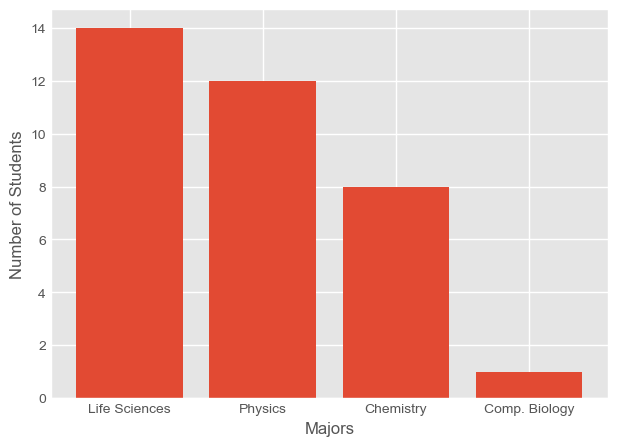

In [70]:
# Define a dictionary containing the number of students for each major
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

# Extract the majors (keys) from the dictionary
majors = list(student_numbers.keys())

# Extract the corresponding number of students (values) from the dictionary
numbers = list(student_numbers.values())

# Set the style of the plot to 'ggplot'
plt.style.use('ggplot')

# Create a bar plot with the majors on the x-axis and the number of students on the y-axis
plt.bar(majors, numbers)

# Set the label for the x-axis
plt.xlabel('Majors')

# Set the label for the y-axis
plt.ylabel('Number of Students')

Text(0.5, 1.0, 'Number of Students by Major')

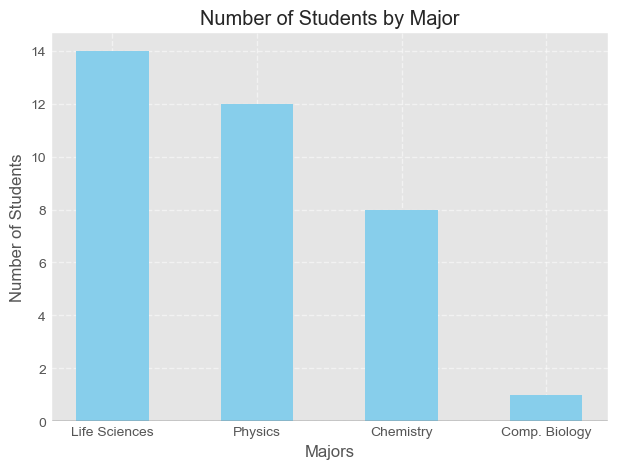

In [71]:
# Define a dictionary containing the number of students for each major
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

# Extract the majors (keys) from the dictionary
majors = list(student_numbers.keys())

# Extract the corresponding number of students (values) from the dictionary
numbers = list(student_numbers.values())

# Set the style of the plot to 'ggplot'
plt.style.use('ggplot')

# Create a bar plot with the majors on the x-axis and the number of students on the y-axis
# Customize the color of the bars
# Customize the width of the bars
# Add gridlines to the plot
# Add horizontal line at y=0
plt.bar(majors, numbers, color='skyblue', width=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)

# Set the label for the x-axis
plt.xlabel('Majors')

# Set the label for the y-axis
plt.ylabel('Number of Students')

# Set the title of the plot
plt.title('Number of Students by Major')

## Pie charts

Text(0.5, 1.0, 'Percentage of each major')

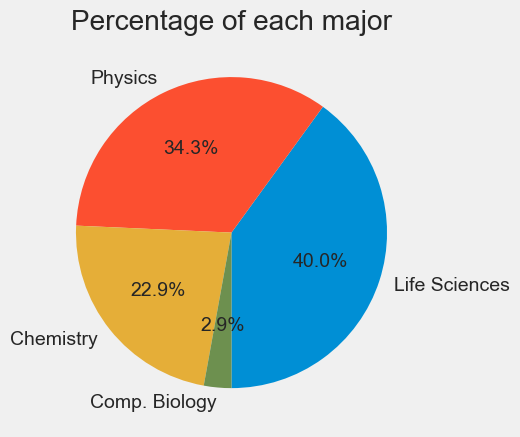

In [69]:
# Define a dictionary containing the number of students for each major
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

# Extract the majors (keys) from the dictionary
majors = list(student_numbers.keys())

# Extract the corresponding number of students (values) from the dictionary
numbers = list(student_numbers.values())

# Set the style of the plot to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Create a pie chart with the percentage of students for each major
# 'labels' parameter specifies the labels for each slice (major)
# 'autopct' parameter formats the percentages to one decimal place
# 'startangle' parameter rotates the pie chart to start from the specified angle (-90 degrees in this case)
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )

# Set the title of the pie chart
plt.title('Percentage of each major')

Text(0.5, 1.0, 'Percentage of each major')

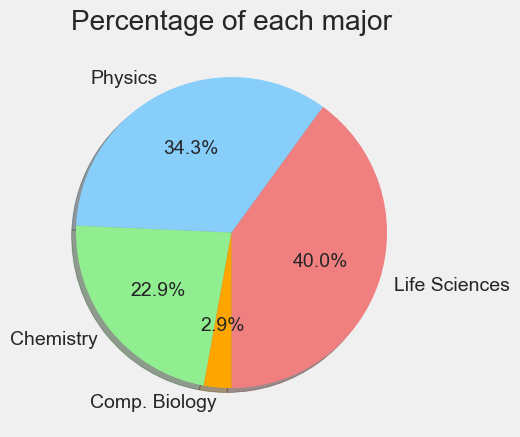

In [72]:
# Define a dictionary containing the number of students for each major
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

# Extract the majors (keys) from the dictionary
majors = list(student_numbers.keys())

# Extract the corresponding number of students (values) from the dictionary
numbers = list(student_numbers.values())

# Set the style of the plot to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Create a pie chart with the percentage of students for each major
# 'labels' parameter specifies the labels for each slice (major)
# 'autopct' parameter formats the percentages to one decimal place
# 'startangle' parameter rotates the pie chart to start from the specified angle (-90 degrees in this case)
# Customize the colors of the slices
# Add shadow effect to the pie chart
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90,
        colors=['lightcoral', 'lightskyblue', 'lightgreen', 'orange'],
        shadow=True                
        )

# Set the title of the pie chart
plt.title('Percentage of each major')